<type 'numpy.ndarray'>


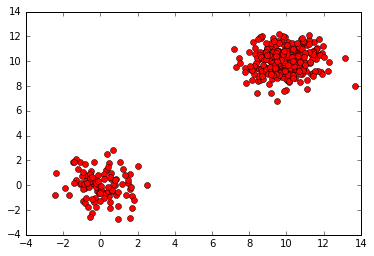

In [3]:
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline  

obs = np.concatenate((np.random.randn(100, 2), 10 + np.random.randn(300, 2)))
print type(obs)
plt.plot(obs[:,0], obs[:,1], 'ro')
plt.show()

In [12]:
gmm = mixture.GMM(n_components=2, n_iter = 100)
gmm.fit(obs) 
print gmm
print np.round(gmm.weights_,2)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)
[ 0.75  0.25]


2500 2500


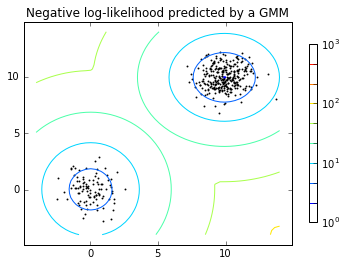

In [13]:
from matplotlib.colors import LogNorm
# display predicted scores by the model as a contour plot
x = np.linspace(-4.0, 14.0)
y = np.linspace(-4.0, 14.0)
X, Y = np.meshgrid(x, y)
print X.size, Y.size
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)[0]
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(obs[:, 0], obs[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

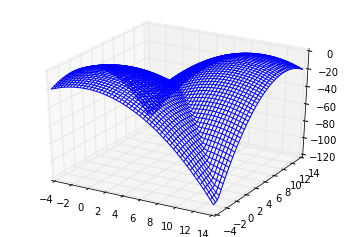

In [25]:
from mpl_toolkits.mplot3d import Axes3D

Z= -Z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, Z)
plt.show()